# Specific marker genes per cluster

In [1]:
%matplotlib inline

In [2]:
library(Seurat)
library(ggplot2)
library(cowplot)

#Load the data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_no_out.rds")

# Unique markers per cluster

In [3]:
clusters<- data.frame(table(Idents(xenopus.combined)))[['Var1']]

In [4]:
library(rlist)

DefaultAssay(xenopus.combined) <- "RNA"

add.col<-function(df, new.col){
    n.row<-dim(df)[1]
    length(new.col)<-n.row
    cbind(df, new.col)
    }
                                

for (i in 0:(length(clusters)-1)){
    #print(i)
    k.PC<-0
    for (j in 0:(length(clusters)-1)){
        print(c(i,j))
        if(i!=j){
            tmp.unique.markers <- FindMarkers(xenopus.combined, ident.1 = i,ident.2 = j,
only.pos = TRUE,min.pct = 0.25, logfc.threshold = 0.25)
            #tmp.unique.markers <- tmp.unique.markers[(tmp.unique.markers$avg_logFC) > 1,]
            tmp.unique.markers <- tmp.unique.markers[(tmp.unique.markers$p_val_adj) < 0.1,]
            #print(length(rownames(tmp.unique.markers)))
            if(k.PC==0){
                unique.markers.df <- data.frame(rownames(tmp.unique.markers)
                                                , rep(1, length(rownames(tmp.unique.markers))))
                colnames(unique.markers.df) <- c('Gene','Succ_PC')
            }else{
                if(length(rownames(tmp.unique.markers))>0){
                   for(k in 1:length(rownames(tmp.unique.markers))){
                    if(rownames(tmp.unique.markers)[k] %in% unique.markers.df$Gene){
                        idx <- match(rownames(tmp.unique.markers)[k],unique.markers.df$Gene)
                        unique.markers.df$Succ_PC[idx] <- unique.markers.df$Succ_PC[idx]+1
                    }
                } 
                }
                
            } 
            #print(unique.markers.df)
            k.PC <- k.PC + 1
        }
        
    }
    #Sort per successful pairwise comparisons
    
    #unique.markers.df <- unique.markers.df[unique.markers.df$Succ_PC==(length(clusters)-1),]
    #Sort unique.markers.df according to number of successful PC
    #print(unique.markers.df)
    unique.markers.df <- unique.markers.df[order(-unique.markers.df$Succ_PC),]
    print(c(i,length(rownames(unique.markers.df))))
    if(i==0){
        markers.cl0 <- unique.markers.df
    }else if(i==1){
        markers.cl1 <- unique.markers.df
    }else if(i==2){
        markers.cl2 <- unique.markers.df
    }else if(i==3){
        markers.cl3 <- unique.markers.df
    }else if(i==4){
        markers.cl4 <- unique.markers.df
    }else if(i==5){
        markers.cl5 <- unique.markers.df
    }else if(i==6){
        markers.cl6 <- unique.markers.df
    }else if(i==7){
        markers.cl7 <- unique.markers.df
    }else if(i==8){
        markers.cl8 <- unique.markers.df
    }else if(i==9){
        markers.cl9 <- unique.markers.df
    }
}

[1] 0 0
[1] 0 1
[1] 0 2
[1] 0 3
[1] 0 4
[1] 0 5
[1] 0 6
[1] 0 7
[1] 0 8
[1] 0 9
[1]   0 562
[1] 1 0
[1] 1 1
[1] 1 2
[1] 1 3
[1] 1 4
[1] 1 5
[1] 1 6
[1] 1 7
[1] 1 8
[1] 1 9
[1]   1 756
[1] 2 0
[1] 2 1
[1] 2 2
[1] 2 3
[1] 2 4
[1] 2 5
[1] 2 6
[1] 2 7
[1] 2 8
[1] 2 9
[1]   2 603
[1] 3 0
[1] 3 1
[1] 3 2
[1] 3 3
[1] 3 4
[1] 3 5
[1] 3 6
[1] 3 7
[1] 3 8
[1] 3 9
[1]   3 106
[1] 4 0
[1] 4 1
[1] 4 2
[1] 4 3
[1] 4 4
[1] 4 5
[1] 4 6
[1] 4 7
[1] 4 8
[1] 4 9
[1]   4 530
[1] 5 0
[1] 5 1
[1] 5 2
[1] 5 3
[1] 5 4
[1] 5 5
[1] 5 6
[1] 5 7
[1] 5 8
[1] 5 9
[1]  5 78
[1] 6 0
[1] 6 1
[1] 6 2
[1] 6 3
[1] 6 4
[1] 6 5
[1] 6 6
[1] 6 7
[1] 6 8
[1] 6 9
[1]  6 47
[1] 7 0
[1] 7 1
[1] 7 2
[1] 7 3
[1] 7 4
[1] 7 5
[1] 7 6
[1] 7 7
[1] 7 8
[1] 7 9
[1]   7 399
[1] 8 0
[1] 8 1
[1] 8 2
[1] 8 3
[1] 8 4
[1] 8 5
[1] 8 6
[1] 8 7
[1] 8 8
[1] 8 9
[1]   8 112
[1] 9 0
[1] 9 1
[1] 9 2
[1] 9 3
[1] 9 4
[1] 9 5
[1] 9 6
[1] 9 7
[1] 9 8
[1] 9 9
[1]   9 221


In [5]:
write.csv(markers.cl0,"specific_markers_cluster0.csv", row.names = TRUE)
write.csv(markers.cl1,"specific_markers_cluster1.csv", row.names = TRUE)
write.csv(markers.cl2,"specific_markers_cluster2.csv", row.names = TRUE)
write.csv(markers.cl3,"specific_markers_cluster3.csv", row.names = TRUE)
write.csv(markers.cl4,"specific_markers_cluster4.csv", row.names = TRUE)
write.csv(markers.cl5,"specific_markers_cluster5.csv", row.names = TRUE)
write.csv(markers.cl6,"specific_markers_cluster6.csv", row.names = TRUE)
write.csv(markers.cl7,"specific_markers_cluster7.csv", row.names = TRUE)
write.csv(markers.cl8,"specific_markers_cluster8.csv", row.names = TRUE)
write.csv(markers.cl9,"specific_markers_cluster9.csv", row.names = TRUE)

In [3]:
library(grid)

suppressPackageStartupMessages({
  library(rlang)
})

DoMultiBarHeatmap <- function (object, 
                               features = NULL, 
                               cells = NULL, 
                               group.by = "ident", 
                               additional.group.by = NULL, 
                               additional.group.sort.by = NULL, 
                               cols.use = NULL,
                               group.bar = TRUE, 
                               disp.min = -2.5, 
                               disp.max = NULL, 
                               slot = "scale.data", 
                               assay = NULL, 
                               label = TRUE, 
                               size = 5.5, 
                               hjust = 0, 
                               angle = 45, 
                               raster = TRUE, 
                               draw.lines = TRUE, 
                               lines.width = NULL, 
                               group.bar.height = 0.02, 
                               combine = TRUE) 
{
  cells <- cells %||% colnames(x = object)
  if (is.numeric(x = cells)) {
    cells <- colnames(x = object)[cells]
  }
  assay <- assay %||% DefaultAssay(object = object)
  DefaultAssay(object = object) <- assay
  features <- features %||% VariableFeatures(object = object)
  ## Why reverse???
  features <- rev(x = unique(x = features))
  disp.max <- disp.max %||% ifelse(test = slot == "data", 
                                   yes = 2.5, no = 6)
  possible.features <- rownames(x = GetAssayData(object = object, 
                                                 slot = slot))
  if (any(!features %in% possible.features)) {
    bad.features <- features[!features %in% possible.features]
    features <- features[features %in% possible.features]
    if (length(x = features) == 0) {
      stop("No requested features found in the ", slot, 
           " slot for the ", assay, " assay.")
    }
    warning("The following features were omitted as they were not found in the ", 
            slot, " slot for the ", assay, " assay: ", paste(bad.features, 
                                                             collapse = ", "))
  }
  
  if (!is.null(additional.group.sort.by)) {
    if (any(!additional.group.sort.by %in% additional.group.by)) {
      bad.sorts <- additional.group.sort.by[!additional.group.sort.by %in% additional.group.by]
      additional.group.sort.by <- additional.group.sort.by[additional.group.sort.by %in% additional.group.by]
      if (length(x = bad.sorts) > 0) {
        warning("The following additional sorts were omitted as they were not a subset of additional.group.by : ", 
                paste(bad.sorts, collapse = ", "))
      }
    }
  }
  
  data <- as.data.frame(x = as.matrix(x = t(x = GetAssayData(object = object, 
                                                             slot = slot)[features, cells, drop = FALSE])))
  
  object <- suppressMessages(expr = StashIdent(object = object, 
                                               save.name = "ident"))
  group.by <- group.by %||% "ident"
  groups.use <- object[[c(group.by, additional.group.by[!additional.group.by %in% group.by])]][cells, , drop = FALSE]
  plots <- list()
  for (i in group.by) {
    data.group <- data
    if (!is_null(additional.group.by)) {
      additional.group.use <- additional.group.by[additional.group.by!=i]  
      if (!is_null(additional.group.sort.by)){
        additional.sort.use = additional.group.sort.by[additional.group.sort.by != i]  
      } else {
        additional.sort.use = NULL
      }
    } else {
      additional.group.use = NULL
      additional.sort.use = NULL
    }
    
    group.use <- groups.use[, c(i, additional.group.use), drop = FALSE]
    
    for(colname in colnames(group.use)){
      if (!is.factor(x = group.use[[colname]])) {
        group.use[[colname]] <- factor(x = group.use[[colname]])
      }  
    }
    
    if (draw.lines) {
      lines.width <- lines.width %||% ceiling(x = nrow(x = data.group) * 
                                                0.0025)
      placeholder.cells <- sapply(X = 1:(length(x = levels(x = group.use[[i]])) * 
                                           lines.width), FUN = function(x) {
                                             return(Seurat:::RandomName(length = 20))
                                           })
      placeholder.groups <- data.frame(rep(x = levels(x = group.use[[i]]), times = lines.width))
      group.levels <- list()
      group.levels[[i]] = levels(x = group.use[[i]])
      for (j in additional.group.use) {
        group.levels[[j]] <- levels(x = group.use[[j]])
        placeholder.groups[[j]] = NA
      }
      
      colnames(placeholder.groups) <- colnames(group.use)
      rownames(placeholder.groups) <- placeholder.cells
      
      group.use <- sapply(group.use, as.vector)
      rownames(x = group.use) <- cells
      
      group.use <- rbind(group.use, placeholder.groups)
      
      for (j in names(group.levels)) {
        group.use[[j]] <- factor(x = group.use[[j]], levels = group.levels[[j]])
      }
      
      na.data.group <- matrix(data = NA, nrow = length(x = placeholder.cells), 
                              ncol = ncol(x = data.group), dimnames = list(placeholder.cells, 
                                                                           colnames(x = data.group)))
      data.group <- rbind(data.group, na.data.group)
    }
    
    order_expr <- paste0('order(', paste(c(i, additional.sort.use), collapse=','), ')')
    group.use = with(group.use, group.use[eval(parse(text=order_expr)), , drop=F])
    
    plot <- Seurat:::SingleRasterMap(data = data.group, raster = raster, 
                                     disp.min = disp.min, disp.max = disp.max, feature.order = features, 
                                     cell.order = rownames(x = group.use), group.by = group.use[[i]])
    
    if (group.bar) {
      pbuild <- ggplot_build(plot = plot)
      group.use2 <- group.use
      cols <- list()
      na.group <- Seurat:::RandomName(length = 20)
      for (colname in rev(x = colnames(group.use2))) {
        if (colname == i) {
          colid = paste0('Identity (', colname, ')')
        } else {
          colid = colname
        }
        
        # Default
        cols[[colname]] <- c(scales::hue_pal()(length(x = levels(x = group.use[[colname]]))))  
        
        #Overwrite if better value is provided
        if (!is_null(cols.use[[colname]])) {
          req_length = length(x = levels(group.use))
          if (length(cols.use[[colname]]) < req_length){
            warning("Cannot use provided colors for ", colname, " since there aren't enough colors.")
          } else {
            if (!is_null(names(cols.use[[colname]]))) {
              if (all(levels(group.use[[colname]]) %in% names(cols.use[[colname]]))) {
                cols[[colname]] <- as.vector(cols.use[[colname]][levels(group.use[[colname]])])
              } else {
                warning("Cannot use provided colors for ", colname, " since all levels (", paste(levels(group.use[[colname]]), collapse=","), ") are not represented.")
              }
            } else {
              cols[[colname]] <- as.vector(cols.use[[colname]])[c(1:length(x = levels(x = group.use[[colname]])))]
            }
          }
        }
        
        # Add white if there's lines
        if (draw.lines) {
          levels(x = group.use2[[colname]]) <- c(levels(x = group.use2[[colname]]), na.group)  
          group.use2[placeholder.cells, colname] <- na.group
          cols[[colname]] <- c(cols[[colname]], "#FFFFFF")
        }
        names(x = cols[[colname]]) <- levels(x = group.use2[[colname]])
        
        y.range <- diff(x = pbuild$layout$panel_params[[1]]$y.range)
        y.pos <- max(pbuild$layout$panel_params[[1]]$y.range) + y.range * 0.015
        y.max <- y.pos + group.bar.height * y.range
        pbuild$layout$panel_params[[1]]$y.range <- c(pbuild$layout$panel_params[[1]]$y.range[1], y.max)
        
        plot <- suppressMessages(plot + 
                                   annotation_raster(raster = t(x = cols[[colname]][group.use2[[colname]]]),  xmin = -Inf, xmax = Inf, ymin = y.pos, ymax = y.max) + 
                                   annotation_custom(grob = grid::textGrob(label = colid, hjust = 0, gp = gpar(cex = 0.75)), ymin = mean(c(y.pos, y.max)), ymax = mean(c(y.pos, y.max)), xmin = Inf, xmax = Inf) +
                                   coord_cartesian(ylim = c(0, y.max), clip = "off")) 
        
        if ((colname == i) && label) {
          x.max <- max(pbuild$layout$panel_params[[1]]$x.range)
          x.divs <- pbuild$layout$panel_params[[1]]$x.major
          group.use$x <- x.divs
          label.x.pos <- tapply(X = group.use$x, INDEX = group.use[[colname]],
                                FUN = median) * x.max
          label.x.pos <- data.frame(group = names(x = label.x.pos), 
                                    label.x.pos)
          plot <- plot + geom_text(stat = "identity", 
                                   data = label.x.pos, aes_string(label = "group", 
                                                                  x = "label.x.pos"), y = y.max + y.max * 
                                     0.03 * 0.5, angle = angle, hjust = hjust, 
                                   size = size)
          plot <- suppressMessages(plot + coord_cartesian(ylim = c(0, 
                                                                   y.max + y.max * 0.002 * max(nchar(x = levels(x = group.use[[colname]]))) * 
                                                                     size), clip = "off"))
        }
      }
    }
    plot <- plot + theme(line = element_blank())
    plots[[i]] <- plot
  }
  if (combine) {
    plots <- CombinePlots(plots = plots)
  }
  return(plots)
}

In [7]:
my_levels <- c(1,2,4,0,5,6,3,8,9,7)

# Re-level object@ident
xenopus.combined@active.ident <- factor(x = xenopus.combined@active.ident, levels = my_levels)

In [8]:
table((xenopus.combined@meta.data$seurat_clusters))


  0   1   2   3   4   5   6   7   8   9  10 
748 732 412 347 266 220 163 173 169 134   0 

In [9]:
table(Idents(xenopus.combined), xenopus.combined$stim)

   
    SIGAA2 SIGAB2 SIGAH12 SIGAH5
  1    191     88     209    244
  2    102     79     124    107
  4     27     24     137     78
  0    123    148     242    235
  5     24     38      63     95
  6     20     34      57     52
  3     35     44      60    208
  8     25      7      30    107
  9      4     17      86     27
  7      8     16      35    114

In [10]:
library(dplyr)
top5<- c(as.vector((markers.cl1 %>% slice(1:5))$Gene),
         as.vector((markers.cl2 %>% slice(1:5))$Gene),
         as.vector((markers.cl4 %>% slice(1:5))$Gene),
         as.vector((markers.cl0 %>% slice(1:5))$Gene),
         as.vector((markers.cl5 %>% slice(1:5))$Gene),
         as.vector((markers.cl6 %>% slice(1:5))$Gene),
         as.vector((markers.cl3 %>% slice(1:5))$Gene),
         as.vector((markers.cl8 %>% slice(1:5))$Gene),
         as.vector((markers.cl9 %>% slice(1:5))$Gene),
         as.vector((markers.cl7 %>% slice(1:5))$Gene))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
require(scales)

hue_pal()(11)[2]

Loading required package: scales



[1] "#DB8E00"

In [12]:
table(Idents(xenopus.combined))


  1   2   4   0   5   6   3   8   9   7 
732 412 266 748 220 163 347 169 134 173 

In [13]:
levels(factor(xenopus.combined@meta.data$seurat_clusters))
xenopus.combined@meta.data$seurat_clusters <- factor(xenopus.combined@meta.data$seurat_clusters, levels=c(1,2,4,0,5,6,3,8,9,7))
levels(xenopus.combined@meta.data$seurat_clusters)

[1] "0" "1" "2" "3" "4" "5" "6" "7" "8" "9"

[1] "1" "2" "4" "0" "5" "6" "3" "8" "9" "7"

Centering and scaling data matrix

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


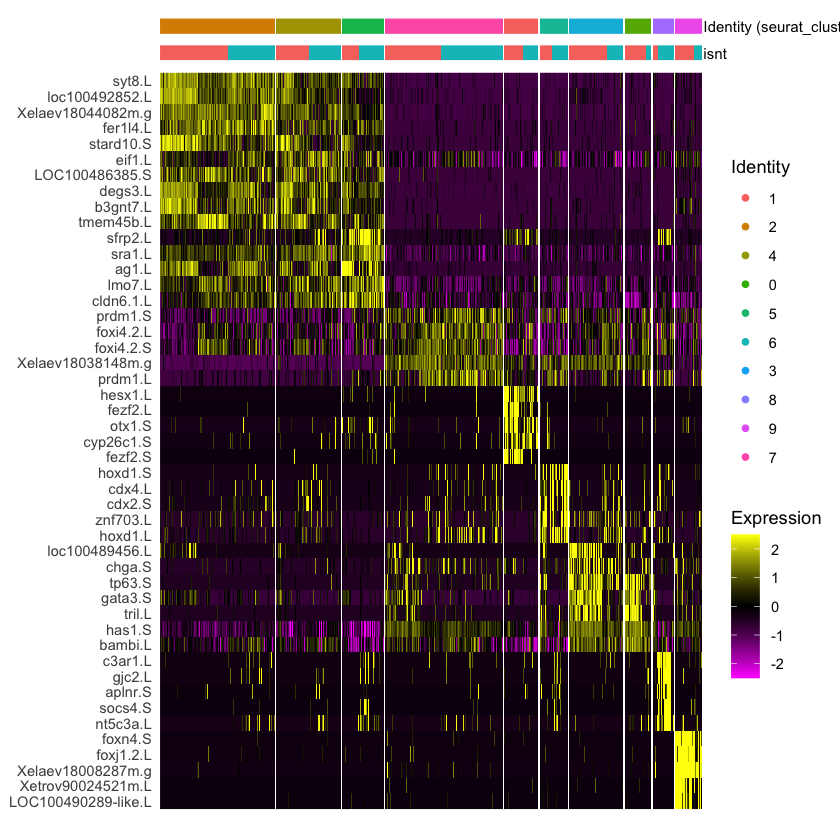

In [14]:
#Order cells for IVF/NT annd add bar at the top
#DoHeatmap(xenopus.combined, features = top5) 
#Load the data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered.rds")

DefaultAssay(xenopus.combined) <- "RNA"
xenopus.combined <- ScaleData(xenopus.combined)

xenopus.combined@meta.data$seurat_clusters <- factor(x = xenopus.combined@meta.data$seurat_clusters
                                           ,levels=c(1,2,4,0,5,6,3,8,9,7))

cols.use <- list(seurat_clusters=c(hue_pal()(11)[2],hue_pal()(11)[3],hue_pal()(11)[5],
                                   hue_pal()(11)[11],hue_pal()(11)[1],
                                   hue_pal()(11)[6],hue_pal()(11)[7],
                                   hue_pal()(11)[4],hue_pal()(11)[9],
                                   hue_pal()(11)[10],hue_pal()(11)[8]))

DoMultiBarHeatmap(xenopus.combined, features=top5, group.by='seurat_clusters',label=F,
                  assay='RNA',slot='scale.data',disp.max=2.5,cols.use=cols.use,
                  additional.group.by = c('isnt'), additional.group.sort.by = c('isnt'))
ggsave(filename="specific_markers_XeLaev.png",dpi = 600, width = 8, height = 6, units = "in")

# Heatmap cell type markers with cluster annotation

In [24]:
c0.tomas.markers <- c('Xelaev18038148m.g','prdm1.L','prdm1.S','sox11.L',
                      'foxi4.2.L','foxi4.2.S')

c1.tomas.markers <- c('stard10.S', 'krt5.7.L', 'muc4.S',
                      'xk81a1.S','ppl.S','itln1.L')

c12.tomas.markers <- c('krt.L','krt12.S','xk81a1.L')

c2.tomas.markers <- c('krt5.7.S','eif1.L')

c3.tomas.markers <- c('tp63.S', 'tril.L', 'gata3.S', 'chga.S', 'tbx2.L', 'gby.L')

c4.tomas.markers <- c('sra1.L', 'nkx3-1.L', 'agr2.L', 'ag1.L', 'otx2.S', 'otx2.L', 'crx.L',
                      'crx.S')

c5.tomas.markers <- c('pax6.L', 'hesx1.L', 'fezf2.L', 'prdm14.L', 'crx.L', 'crx.S',
                      'sox3.S', 'zic1.S')

c6.tomas.markers <- c('cdx4.L', 'cdx4.S', 'hoxd1.S', 'hoxd1.L', 'wnt8a.L', 'cdx2.S')

c7.tomas.markers <- c('foxj1.S', 'foxj1.2.S', 'myb.S', 'myb.L', 'ccno.S', 'ccno.L',
                      'Xelaev18008287m.g', 'foxn4.S', 'Xetrov90024521m.L','LOC100490289-like.L')

c8.tomas.markers <- c('tp63.S','tril.L','gata3.S','ctbs.S','gby.L','tbx2.L')

c9.1.tomas.markers <- c('foxi1.L','ubp1.S','gata2.L','krt12.S','krt5.7.S')

c9.0.tomas.markers <- c('c3ar1.L', 'gjc2.L', 'socs4.S', 'cdkn1a.L', 'march8.S', 'nppb.S',
                        'aplnr.S','hars.L','nt5c3a.L','ckap2.S','eda2r.L')

In [25]:
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_no_out.rds")

DefaultAssay(xenopus.combined) <- "RNA"
xenopus.combined <- ScaleData(xenopus.combined)

my.df <- xenopus.combined[['seurat_clusters']]

#Assign subcluster labels to cluster 9 and remove the SIGAA2 cells of cluster 9
clus9.idents <- read.csv('labels_subclustering_cl9.csv')

Centering and scaling data matrix



In [26]:
%get my.df --from R
%get clus9.idents --from R

arr=list(my_df['seurat_clusters'])

for i in range(len(my_df)):
    if (my_df.index[i] not in list(clus9_idents['X'])) and arr[i]=='9':
        arr[i]='NA'
    elif my_df.index[i] in list(clus9_idents['X']):
        
        idx=list(clus9_idents['X']).index(my_df.index[i])
        
        if clus9_idents['seurat_clusters'].iloc[idx]==0:
            arr[i]='9'
        elif clus9_idents['seurat_clusters'].iloc[idx]==1:
            arr[i]='10'
            

my_df['seurat_clusters_new']=arr

Variable my.df is put to SoS as my_df
Variable clus9.idents is put to SoS as clus9_idents


In [27]:
my_df.groupby('seurat_clusters_new').count()

,seurat_clusters
seurat_clusters_new,
0,748
1,732
10,30
2,412
3,347
4,266
5,220
6,163
7,173


In [28]:
new_labs=list(my_df['seurat_clusters_new'])

In [29]:
%get new_labs


require(scales)

xenopus.combined@meta.data$seurat_clusters_new <- new_labs

xenopus.combined <- subset(xenopus.combined, subset = seurat_clusters_new != "NA")

levels(factor(xenopus.combined@meta.data$seurat_clusters_new))
# xenopus.combined@meta.data$seurat_clusters <- factor(xenopus.combined@meta.data$seurat_clusters_new, levels=c(1,2,4,0,5,6,3,8,9,7))
# levels(xenopus.combined@meta.data$seurat_clusters_new)

[1] "0"  "1"  "10" "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


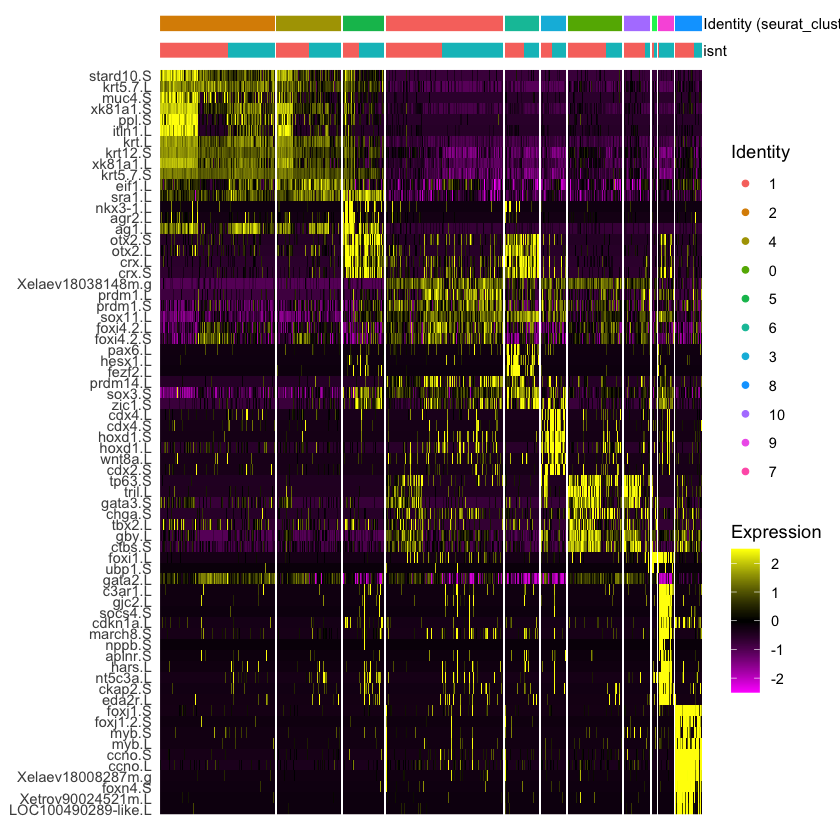

In [30]:
xenopus.combined@meta.data$seurat_clusters_new <- factor(x = xenopus.combined@meta.data$seurat_clusters_new
                                           ,levels=c(1,2,4,0,5,6,3,8,10,9,7))

library(dplyr)
my.features <- c(as.vector(c1.tomas.markers),
                 as.vector(c12.tomas.markers),
                 as.vector(c2.tomas.markers),
                 as.vector(c4.tomas.markers),
                 as.vector(c0.tomas.markers),
                 as.vector(c5.tomas.markers),
                 as.vector(c6.tomas.markers),
                 as.vector(c3.tomas.markers),
                 as.vector(c8.tomas.markers),
                 as.vector(c9.1.tomas.markers),
                 as.vector(c9.0.tomas.markers),
                 as.vector(c7.tomas.markers))

cols.use <- list(seurat_clusters_new=c(hue_pal()(11)[2],hue_pal()(11)[3],hue_pal()(11)[5],
                                   hue_pal()(11)[1],
                                   hue_pal()(11)[6],hue_pal()(11)[7],
                                   hue_pal()(11)[4],hue_pal()(11)[9],
                                   '#0AF25F',hue_pal()(13)[12],hue_pal()(11)[8]))

DoMultiBarHeatmap(xenopus.combined, features=my.features, group.by='seurat_clusters_new',label=F,
                  assay='RNA',slot='scale.data',disp.max=2.5,cols.use=cols.use,
                  additional.group.by = c('isnt'), additional.group.sort.by = c('isnt'))
ggsave(filename="anno_heat_XeLaev.pdf", width = 8, height = 8, units = "in")

In [15]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] scales_1.1.1  dplyr_1.0.2   rlang_0.4.9   rlist_0.4.6.1 cowplot_1.1.0
[6] ggplot2_3.3.2 Seurat_3.1.4 

loaded via a namespace (and not attached):
  [1] tsne_0.1-3          nlme_3.1-145        bitops_1.0-6       
  [4] RcppAnnoy_0.0.17    RColorBrewer_1.1-2  httr_1.4.2         
  [7] repr_1.1.0          numDeriv_2016.8-1.1 sctransform_0.2.1  
 [10] tools_3.5.2         R6_2.5.0            irlba_2.3.3        
 [13] KernSmooth_2.23-16  uwot_0.1.9          lazyeval_0.2.2     
 [16] BiocGenerics_0.28.0 colorspace_2.0-0    sn_1